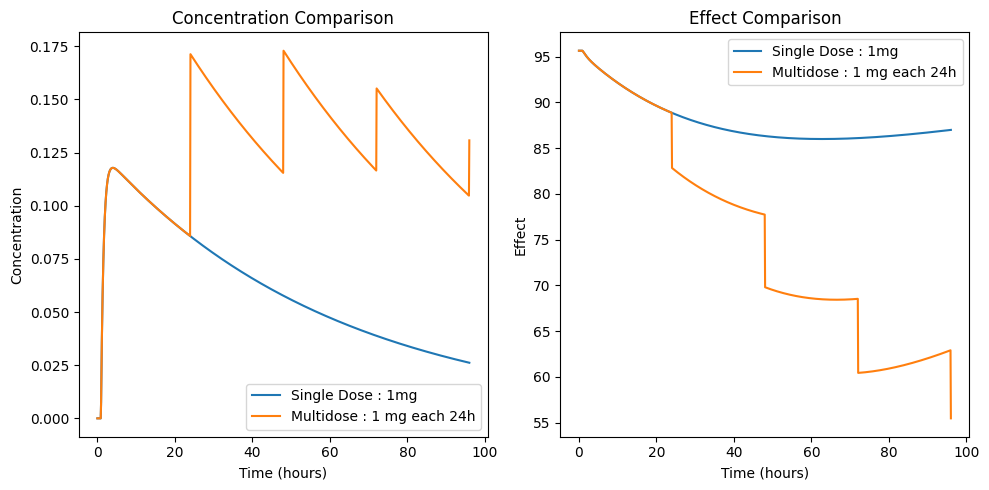

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
Tlag = 0.918
ka = 1.48
V = 8.06895
Cl = 0.133
Imax = 0.94313
IC50 = 1.33276
Rin = 4.97013
kout = 0.05196

# Define the model equation
def model_equation(t, amtDose, Tlag, ka, V, Cl, Imax, IC50, Rin, kout):
    k = Cl / V
    p1 = amtDose * ka / (V * (ka - k))
    tl = np.maximum(t - Tlag - tDose, 0)
    Cc = p1 * (np.exp(-k * tl) - np.exp(-ka * tl))
    E_0 = Rin / kout
    ddt_E = Rin * (1 - Imax * Cc / (Cc + IC50)) - kout * E_0
    return Cc, E_0 + ddt_E * t

# Single dose regimen
t = np.linspace(0, 96, 1000)  # Time range for plotting (maximum time set to 96 hours)
amtDose_single = 1  # Dose for single dose regimen
tDose = 0  # Time delay for dose administration (0 for single dose regimen)

Cc_single, E_single = model_equation(t, amtDose_single, Tlag, ka, V, Cl, Imax, IC50, Rin, kout)

# Multidose regimen
amtDose_multi = np.zeros_like(t)  # Dose at each time point in the multidose regimen
tDose = 0  # Time delay for dose administration (set to 24 hours for multidose regimen)

dose_interval = 24  # Dose administered every 24 hours
num_doses = 10  # Total number of doses

for i in range(num_doses):
    dose_time = i * dose_interval
    dose_index = np.where(t >= dose_time)[0]
    if len(dose_index) > 0:
        amtDose_multi[dose_index[0]:] += amtDose_single

Cc_multi, E_multi = model_equation(t, amtDose_multi, Tlag, ka, V, Cl, Imax, IC50, Rin, kout)

# Plotting concentration (Cc)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, Cc_single, label='Single Dose : 1mg ')
plt.plot(t, Cc_multi, label='Multidose : 1 mg each 24h')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Concentration Comparison')
plt.legend()

# Plotting effect (E)
plt.subplot(1, 2, 2)
plt.plot(t, E_single, label='Single Dose : 1mg ')
plt.plot(t, E_multi, label='Multidose : 1 mg each 24h')
plt.xlabel('Time (hours)')
plt.ylabel('Effect')
plt.title('Effect Comparison')
plt.legend()

plt.tight_layout()
plt.show()